In [1]:
import matplotlib as mplot
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D, axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter

np.set_printoptions(suppress=True)

## Уравнение теплопродовности (явн. разностной схемой):

In [2]:
Lx = 1.
Nx = 10
dx = Lx/Nx

Ly = 1.
Ny = 10
dy = Ly/Ny

In [3]:
# example of 3D array with numpy

N = np.zeros((4,5,3)) # the whole 3D array
OD = np.zeros((5,3)) # a single 2D zero matrix

for i in range(4):
    for j in range(5):
        for k in range(3):
            OD[j,k] = (((i+2)**2 + j**3) * (j**2 + k) * (k**2 + i**4))
        N[i] = OD
        
# panels = pd.Panel(N)
# panels.to_frame()
N

array([[[      0.,       4.,      32.],
        [      0.,      10.,      60.],
        [      0.,      60.,     288.],
        [      0.,     310.,    1364.],
        [      0.,    1156.,    4896.]],

       [[      0.,      18.,      90.],
        [     10.,      40.,     150.],
        [     68.,     170.,     510.],
        [    324.,     720.,    1980.],
        [   1168.,    2482.,    6570.]],

       [[      0.,     272.,     640.],
        [    272.,     578.,    1020.],
        [   1536.,    2040.,    2880.],
        [   6192.,    7310.,    9460.],
        [  20480.,   23120.,   28800.]],

       [[      0.,    2050.,    4250.],
        [   2106.,    4264.,    6630.],
        [  10692.,   13530.,   16830.],
        [  37908.,   42640.,   48620.],
        [ 115344.,  124066.,  136170.]]])

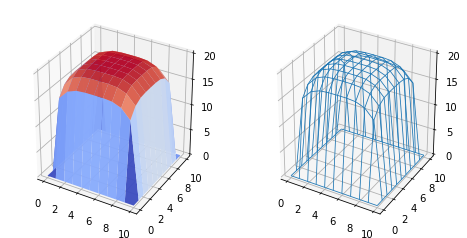

In [4]:
M = np.zeros((11,11))
f = lambda x, y: (-((x-0.5)**4 + (y-0.5)**4) + 0.2) * 100

x = np.linspace(0, Nx, Nx+1)
y = np.linspace(0, Ny, Ny+1)

X, Y = np.meshgrid(y, x)

for i in range(1, Nx):
    x = i * dx
    for j in range(0, Ny):
        y = j * dy
        M[i,j] = f(x, y)

    for i in range(1, Nx):
        M[i, 0] = 0
        M[i, Ny] = 0

    for j in range(0, Ny):
        M[0, j] = 0
        M[Nx, j] = 0


fig = plt.figure(figsize=plt.figaspect(.5))

# surf plane
ax = fig.add_subplot(1,2,1, projection='3d')
surface = ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, linewidth=1, alpha=.95, rstride=1, cstride=1)
# fig.colorbar(surface, shrink=0.5, aspect=5)

# wireframe plane
ax = fig.add_subplot(1,2,2, projection='3d')
wf = ax.plot_wireframe(X, Y, M, linewidth=.8)

plt.show()
# pd.DataFrame(M)

In [5]:
Lt = 10
Nt = 1000
dt = Lt/Nt
D = 0.01
C = ((D * dt)/dx**2) + ((D * dt)/dy**2)
C = round(C, 3)

In [6]:
# Функция от времени
def U(t):
    global M
    M_a = np.copy(M)
    M_new = M_a
    for k in range(1, int(t/dt)):
        for i in range(1, Nx):

            for j in range(1, Ny):
                M_a[i,j] = D * dt * ((M_new[i+1,j] - 2*M_new[i,j] + M_new[i-1,j])/(dx**2) + (M_new[i, j+1] - 2*M_new[i,j] + M_new[i, j-1])/(dy**2)) + M_new[i,j] 

    M_new = M_a
    return M_a

pd.DataFrame(U(0))

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,14.88,16.63,17.28,17.43,17.44,17.43,17.28,16.63,14.88,0.0
2,0.0,16.63,18.38,19.03,19.18,19.19,19.18,19.03,18.38,16.63,0.0
3,0.0,17.28,19.03,19.68,19.83,19.84,19.83,19.68,19.03,17.28,0.0
4,0.0,17.43,19.18,19.83,19.98,19.99,19.98,19.83,19.18,17.43,0.0
5,0.0,17.44,19.19,19.84,19.99,20.00,19.99,19.84,19.19,17.44,0.0
6,0.0,17.43,19.18,19.83,19.98,19.99,19.98,19.83,19.18,17.43,0.0
7,0.0,17.28,19.03,19.68,19.83,19.84,19.83,19.68,19.03,17.28,0.0
8,0.0,16.63,18.38,19.03,19.18,19.19,19.18,19.03,18.38,16.63,0.0
9,0.0,14.88,16.63,17.28,17.43,17.44,17.43,17.28,16.63,14.88,0.0


(11, 11) (11, 11)


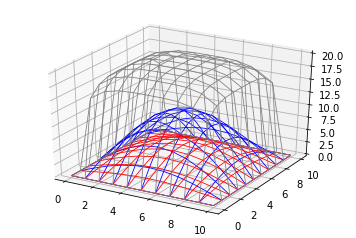

In [7]:
fig = plt.figure()

x = np.linspace(0, Nx, Nx+1)
y = np.linspace(0, Ny, Ny+1)

X, Y = np.meshgrid(y,x)

ax = fig.gca(projection='3d')
print(X.shape, U(0).shape)
ax.plot_wireframe(X, Y, U(0), color='gray', linewidth=.8)
ax.plot_wireframe(X, Y, U(5), color='blue', linewidth=.8)
ax.plot_wireframe(X, Y, U(10), color='red', linewidth=.8)
plt.show()